 # Análisis de Precios de Viviendas en California
El objetivo es identificar los factores que influyen en los altos precios de las viviendas en California. Usarás un conjunto de datos con información sobre diversas propiedades.

La pregunta
Queremos predecir manualmente para un inversor qué zona es la mejor para invertir en bienes raíces en California
Puede haber muchos enfoques para ver esto. Vamos a ver uno de ellos. Es bastante básico

# 1. Exploracion y Limpieza de datos

1.1 Carga del conjunto de datos

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
%matplotlib inline 

#En esta sección realizamos la importación de las bibliotecas fundamentales para nuestro análisis:
- pandas: Para manipulación y análisis de datos
- numpy: Para cálculos numéricos
- matplotlib y seaborn: Para visualización de datos
- scipy.stats: Para análisis estadísticos

In [3]:
#Carga el archivo CSV para la lectura de los datos
ruta_archivo = "../datos/housing.csv"
df = pd.read_csv(ruta_archivo)

In [4]:
#Ver la información general del dataset para la lista de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


El conjunto de datos contiene 20,640 registros con 10 variables sobre propiedades en California:
- 9 variables numéricas (tipo float64)
- 1 variable categórica (ocean_proximity)
Solo hay datos incompletos en la columna total_bedrooms con 207 valores faltantes (aproximadamente 1% del total).
Las variables incluyen:
- Ubicación (longitud, latitud)
- Características de la vivienda (habitaciones, dormitorios, edad)
- Datos demográficos (población, ingresos)
- Valor de la vivienda (variable objetivo)

In [5]:
# Inspeccionar las primeras filas de la lista de datos
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Primeros 5 Registros del Dataset
Los datos muestran propiedades en el área de la Bahía de San Francisco (NEAR BAY):

Ubicación

- Todas están ubicadas cerca de las coordenadas (-122.2 longitud, 37.8 latitud)
- Todas tienen proximidad a la bahía (NEAR BAY)

Características

- La edad media de las viviendas varía entre 21 y 52 años
- El número total de habitaciones va desde 880 hasta 7,099
- Los dormitorios varían entre 129 y 1,106

Datos Demográficos

- Población: varía de 322 a 2,401 habitantes
- Hogares: entre 126 y 1,138
- Ingresos medianos: desde $3.84K hasta $8.32K

Valores de las Propiedades

- Los precios oscilan entre $341,300 y $452,600
- La propiedad más cara está en la primera fila
- Los precios son relativamente similares en esta área
Estos datos sugieren que estamos analizando un vecindario costero de clase media-alta en California.

# 1.2. Análisis Datos Flotantes

Ejecutamos este código para saber si hay valores nulos en las columnas:

In [6]:
#Identificacion de valores nulos en las columnas
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Este código realiza una operación simple pero importante para el análisis de datos:

1. df.isnull() - Crea una matriz booleana donde True indica valores nulos
2. .sum() - Suma los valores True en cada columna
El resultado muestra el conteo total de valores nulos por columna en el DataFrame. En este caso específico, el output mostró que:
- La columna total_bedrooms tenía 207 valores nulos.
- Todas las demás columnas tenían 0 valores nulos.

Este es un paso fundamental en el análisis exploratorio de datos (EDA) ya que nos permite identificar dónde tenemos datos faltantes que podrían necesitar limpieza o tratamiento especial.

In [7]:
#Filtrar filas con cualquier valor nulo
filas_nulas = df[df.isnull().any(axis=1)]
print(filas_nulas)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

Identifica y muestra todas las filas del DataFrame que contienen al menos un valor nulo en cualquiera de sus columnas.

Explicación breve:

- *df.isnull():* crea una matriz de valores True/False donde True indica valores nulos.
- *.any(axis=1):* revisa cada fila y devuelve True si hay al menos un valor nulo en ella.

El resultado final muestra solo las filas que tienen valores faltantes, permitiéndonos ver exactamente dónde están los datos incompletos.

In [8]:
# Eliminamos las filas con valores nulos
df = df.dropna()


Este código elimina todas las filas que contienen valores nulos (NA o NaN) del DataFrame df.

Explicación concisa:

- Es un método de limpieza de datos que remueve completamente cualquier fila que tenga al menos un valor faltante
- El resultado se guarda de nuevo en la variable df, reemplazando el DataFrame original
- En este caso específico, eliminó las 207 filas que tenían valores nulos en la columna total_bedrooms.

Este es un método común de manejo de datos faltantes, aunque debe usarse con cuidado ya que puede resultar en pérdida de información si hay muchos valores nulos.

In [9]:
# Verificamos que se hayan eliminado los valores nulos
print(df.isnull().sum())
filas_nulas = df[df.isnull().any(axis=1)]

# Verificamos la cantidad de filas y columnas después de la limpieza
print(f"Total de filas con valores nulos: {len(filas_nulas)}")

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
Total de filas con valores nulos: 0


Este código realiza una verificación doble para asegurarse de que la limpieza de datos fue exitosa:

- Muestra el conteo de valores nulos por columna
- Cuenta cuántas filas todavía tienen valores nulos

Explicación concisa:

- *df.isnull().sum()* cuenta los valores nulos en cada columna.

- *df[df.isnull().any(axis=1)]* identifica las filas que aún tienen valores nulos.

- *len(filas_nulas)* muestra el total de filas con valores faltantes.

Es básicamente un control de calidad para confirmar que la limpieza de datos fue efectiva.

# 1.3. Inspección de Estadísticas Básicas

In [10]:
#Ejecutar este código para obtener estadísticas descriptivas de las columnas numéricas:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Este código genera estadísticas descriptivas básicas para todas las columnas numéricas del DataFrame, mostrando:

- count: Número total de datos no nulos
- mean: Promedio de los valores
- std: Desviación estándar
- min: Valor mínimo
- 25%: Primer cuartil (percentil 25)
- 50%: Mediana (percentil 50)
- 75%: Tercer cuartil (percentil 75)
max: Valor máximo
Por ejemplo, para median_house_value:
- El precio promedio es $206,864
- El precio mínimo es $14,999
- El precio máximo es $500,001
La mitad de las casas cuestan menos de $179,700 (mediana)

# 2. Análisis Exploratorio de Datos (EDA)

2.1. Visualización de distribuciones de variables individuales

Comencemos analizando cómo se distribuyen las variables numéricas clave en el conjunto de datos.

**Distribución de la variable objetivo (median_house_value):**

Es importante entender cómo se distribuye la variable que intentaremos predecir.

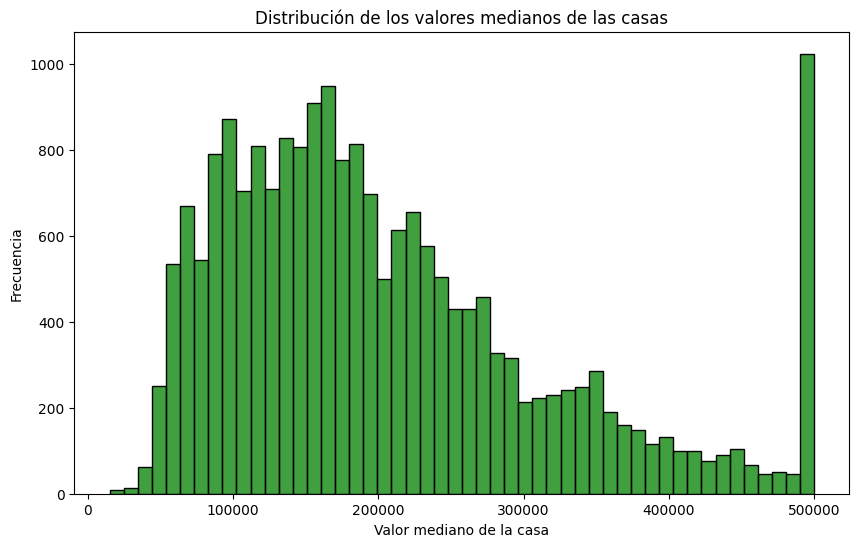

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, color='green')
plt.title('Distribución de los valores medianos de las casas')
plt.xlabel('Valor mediano de la casa')
plt.ylabel('Frecuencia')
plt.show()


Interpretación del gráfico:

1. Distribución general:
- El eje X muestra los valores de las casas (desde $0 hasta $500,000)
- El eje Y muestra la frecuencia (cuántas casas hay en cada rango de precio)
2. Características importantes:
- La distribución está sesgada hacia la derecha (cola larga hacia la derecha)
- Hay un pico notable alrededor de los $150,000-$200,000
- Existe un pico inusual en $500,000, que probablemente indica un valor límite o "cap" en los datos
3. Observaciones clave:
- La mayoría de las casas se concentran en el rango de $100,000 a $300,000
- Hay relativamente pocas casas con valores superiores a $400,000
- El pico en $500,000 sugiere que podría haber casas más caras pero fueron truncadas a este valor máximo.

Este tipo de visualización es útil para entender la distribución de los precios de las casas en el conjunto de datos.

**Distribución de median_income:**

El ingreso medio puede ser un predictor significativo del valor de la vivienda.

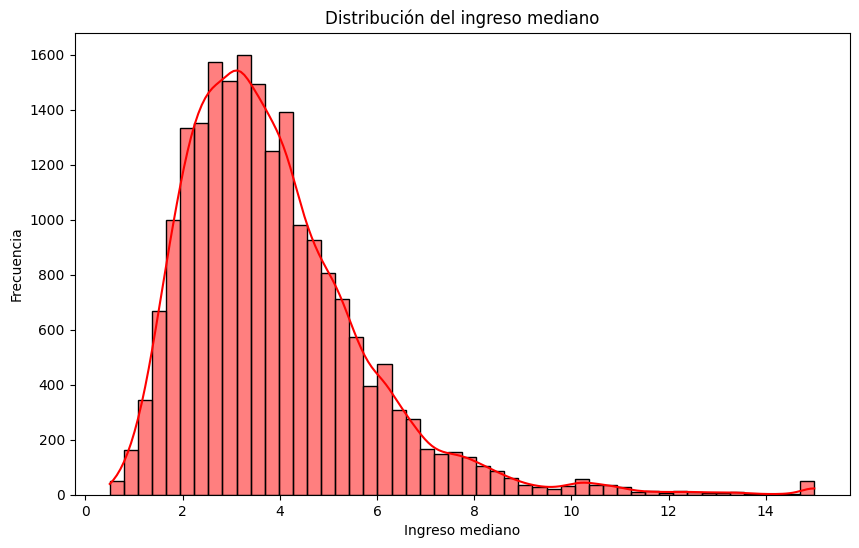

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_income'], bins=50, kde=True, color='red')
plt.title('Distribución del ingreso mediano')
plt.xlabel('Ingreso mediano')
plt.ylabel('Frecuencia')
plt.show()

Este código genera un histograma con una curva de densidad (KDE) usando seaborn:

Interpretación del gráfico:

1. Distribución general:
- El eje X muestra los ingresos medianos (desde 0 hasta 15)
- El eje Y muestra la frecuencia (cuántos hogares hay en cada nivel de ingreso)
- La línea curva naranja representa la densidad de la distribución
2. Características importantes:
- La distribución está sesgada positivamente (cola larga hacia la derecha)
- El pico más alto está alrededor de 3-4 unidades de ingreso
- La mayoría de los ingresos se concentran entre 2 y 6 unidades
3. Observaciones clave:
- Muy pocos hogares tienen ingresos superiores a 10 unidades
- La distribución no es simétrica
- Hay una concentración significativa de hogares con ingresos medianos entre 2 y 5 unidades
- Hay relativamente pocos hogares con ingresos muy bajos (menos de 1) o muy altos (más de 8).

Este gráfico es útil para entender cómo se distribuyen los ingresos en la población estudiada y muestra que la mayoría de los hogares tienen ingresos medianos, con algunos casos de ingresos más altos.

# 2.4 Análisis de correlaciones


El análisis de correlación nos ayuda a identificar relaciones entre las variables del conjunto de datos. Esto es importante para entender qué características tienen mayor influencia en el precio de las casas (median_house_value).

1. Seleccionar columnas numéricas
Primero, nos aseguramos de trabajar solo con las columnas numéricas, ya que la correlación no aplica a datos categóricos como ocean_proximity.

In [13]:
# Seleccionar solo las columnas numericas para el analisis
df_numerico = df.select_dtypes(include=["float64", "int64"])


2. Calcular la matriz de correlación

Generamos la matriz de correlación para estas columnas y la visualizamos con un mapa de calor.

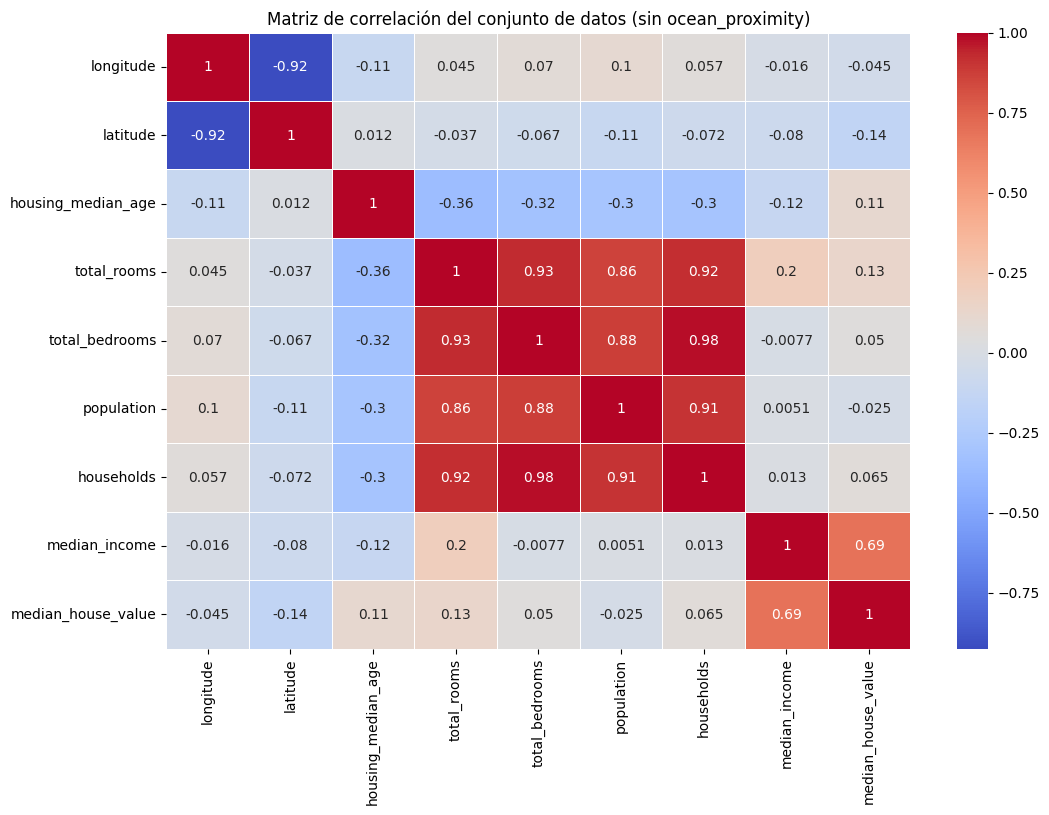

In [14]:
# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación del conjunto de datos (sin ocean_proximity)')
plt.show()

Interpretación del mapa de calor:
1. Colores y valores:
- Rojo intenso: correlación positiva fuerte (cerca de 1)
- Azul intenso: correlación negativa fuerte (cerca de -1)
- Colores claros: correlación débil (cerca de 0)

2. Correlaciones importantes: 

- Fuerte correlación positiva (0.69) entre median_income y median_house_value.
- Correlación muy fuerte (0.98) entre total_bedrooms y households.
- Correlación negativa fuerte (-0.92) entre longitude y latitude.
- Las variables relacionadas con tamaño (total_rooms, total_bedrooms, population, households) están fuertemente correlacionadas entre sí
3. Observaciones clave:
- El ingreso mediano es el factor más correlacionado con el valor de las casas.
- La ubicación geográfica (longitud/latitud) tiene una correlación débil con el valor de las casas.
- La edad de la casa tiene correlaciones débiles con la mayoría de las variables.

Este mapa de calor es útil para identificar relaciones entre variables y posibles predictores importantes para el valor de las casas.

3. Incluir ocean_proximity en el análisis
Convertimos la columna categórica ocean_proximity en variables numéricas usando One-Hot Encoding. Esto nos permite analizar su relación con otras variables.

In [15]:
#Aplicar One-Hot Encoding a la columna ocean_proximity
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

#verifica las nuevas columnas
print(df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

Explicación del Resultado

El resultado muestra las primeras 5 filas del DataFrame con:
1. Columnas originales numéricas mantienen sus valores:
- longitude, latitude, housing_median_age, etc.
2. Nuevas columnas binarias creadas para cada categoría de - - ocean_proximity:
- ocean_proximity_INLAND
- ocean_proximity_ISLAND
- ocean_proximity_NEAR BAY
- ocean_proximity_NEAR OCEAN
3. Valores binarios:
- True (1): la propiedad pertenece a esa categoría
- False (0): la propiedad no pertenece a esa categoría
En el ejemplo, las 5 primeras propiedades están en "NEAR BAY" (True en ocean_proximity_NEAR BAY y False en las demás categorías).

4. Recalcular la matriz de correlación con las variables codificadas
Ahora generamos una nueva matriz de correlación que incluye las columnas codificadas.

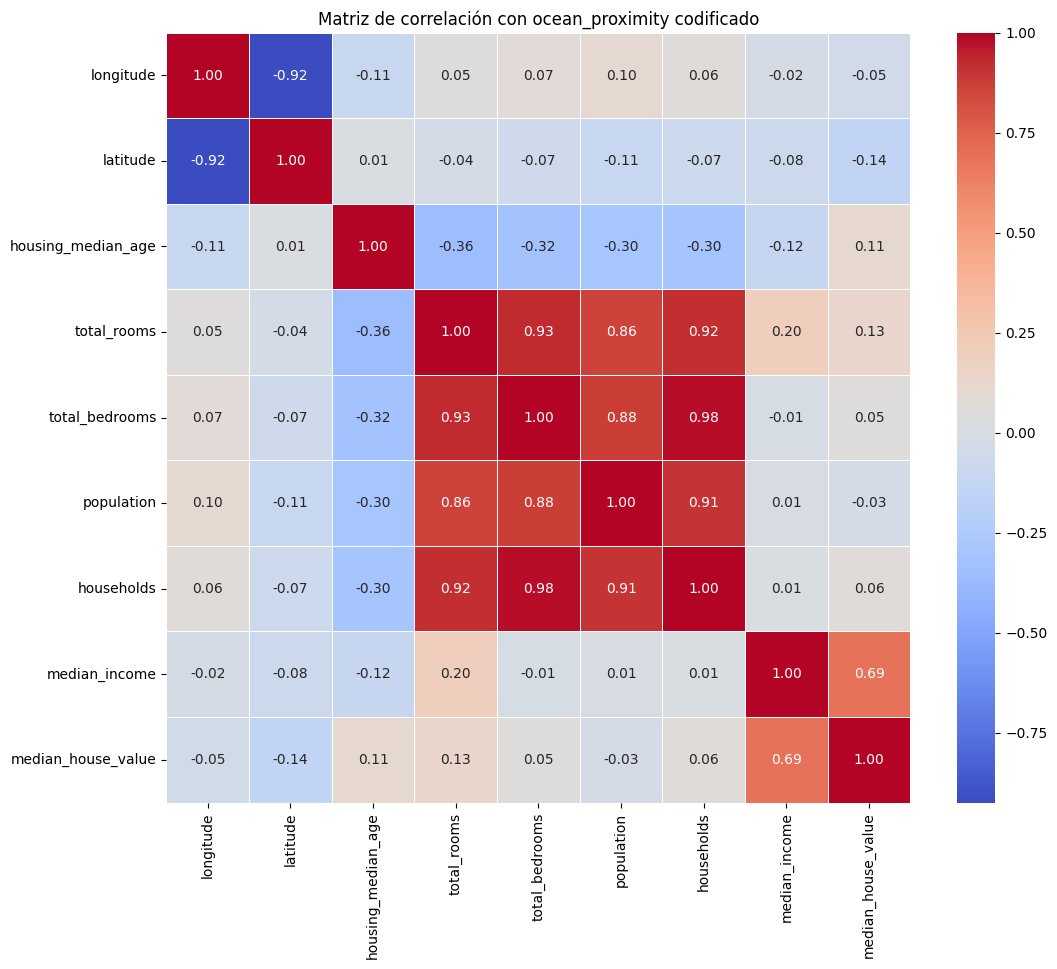

In [16]:
# Seleccionar columnas numéricas nuevamente después de One-Hot Encoding
numerical_columns_encoded = df_encoded.select_dtypes(include=["float64", "int64"])

# Calcular la nueva matriz de correlación
correlation_matrix_encoded = numerical_columns_encoded.corr()

# Mostrar la nueva matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación con ocean_proximity codificado")
plt.show()

Correlaciones más importantes:

1. Correlaciones Positivas Fuertes (rojo):
- total_bedrooms y households (0.98)
- total_rooms y total_bedrooms (0.93)
- population y households (0.91)
- median_income y median_house_value (0.69)
2. Correlaciones Negativas Fuertes (azul):
- longitude y latitude (-0.92)
3. Correlaciones Débiles (colores claros):
- housing_median_age con la mayoría de variables
- median_house_value con ubicación (longitude/latitude)

Observaciones clave:
- Las variables relacionadas con tamaño (rooms, bedrooms, population, households) están fuertemente correlacionadas entre sí.
- El ingreso medio es el mejor predictor del valor de las casas.
- La ubicación geográfica tiene poca influencia directa en los precios.
Este tipo de análisis es fundamental para entender las relaciones entre variables y seleccionar características importantes para modelos predictivos.

2.5. Visualizacion de relaciones clave

Relación entre median_incomeymedian_house_value:

Creamos un gráfico de dispersión para analizar cómo los ingresos medianos afectan el valor de las viviendas.

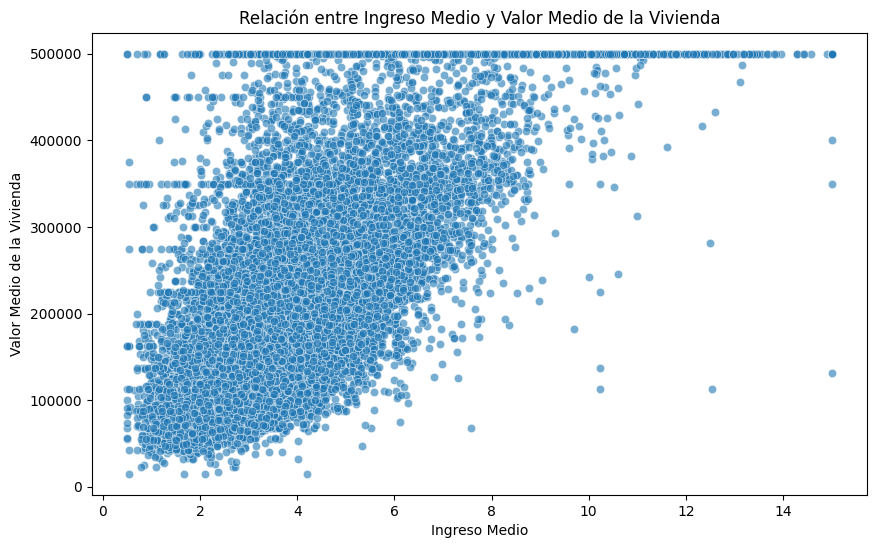

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.6)
plt.title('Relación entre Ingreso Medio y Valor Medio de la Vivienda')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

Descripción del Gráfico:

- Es un gráfico de dispersión que muestra la relación entre ingresos y valores de viviendas.
- Cada punto representa una vivienda.
- Se observa una tendencia positiva clara: a mayor ingreso medio, mayor valor de la vivienda.
- Hay un límite superior visible alrededor de $500,000, sugiriendo un posible truncamiento de datos.
- La dispersión aumenta con el ingreso, indicando mayor variabilidad en precios para ingresos altos
- La mayoría de los datos se concentran en ingresos entre 2 y 8, con valores de vivienda entre $100,000 y $400,000

Relación entre housing_median_ageymedian_house_value:

Verificamos si la antigüedad de las viviendas influye en su valor.

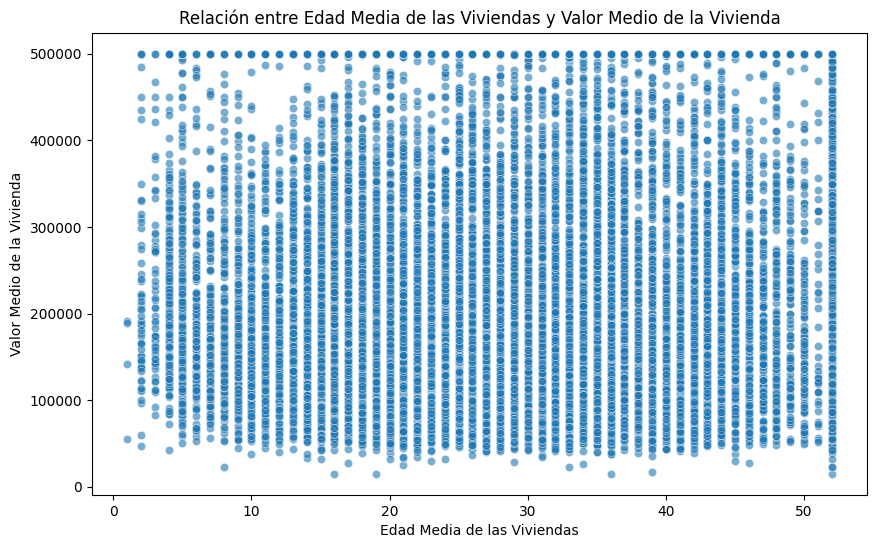

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='housing_median_age', y='median_house_value', alpha=0.6)
plt.title('Relación entre Edad Media de las Viviendas y Valor Medio de la Vivienda')
plt.xlabel('Edad Media de las Viviendas')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

Descripción del Gráfico:

- Muestra la relación entre la edad y el valor de las viviendas.
- No hay una correlación clara entre la edad y el valor.
- Los valores están distribuidos verticalmente en todas las edades.
- Se observa un límite superior en $500,000.
- Las edades de las viviendas van de 1 a 52 años.
- La dispersión de precios es similar en todas las edades.
- Sugiere que la edad de la vivienda no es un factor determinante en su valor.

Relación geográfica ( longitudey latitude):

Visualizar la distribución geográfica de las viviendas junto con sus valores.

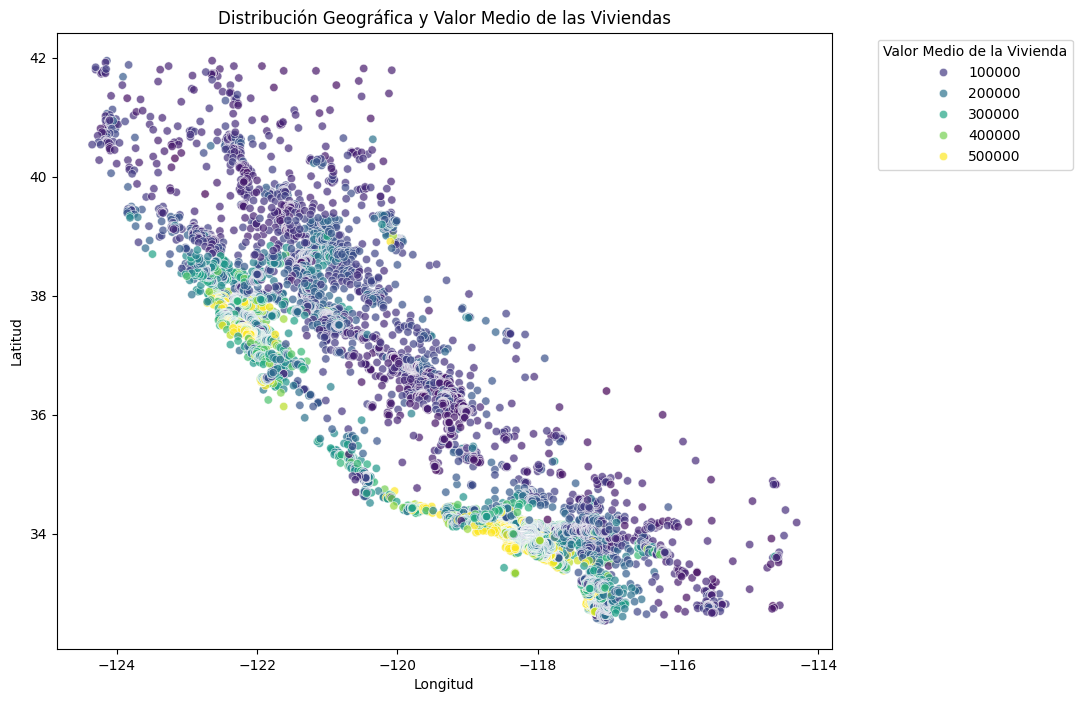

In [19]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='median_house_value',
    palette='viridis',
    alpha=0.7
)
plt.title('Distribución Geográfica y Valor Medio de las Viviendas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Valor Medio de la Vivienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Descripción del Gráfico:

- Muestra la distribución geográfica de las viviendas en California.
- Los colores indican el valor de las viviendas:
 - Morado: valores más bajos ($100,000)
 - Amarillo: valores más altos ($500,000)
- Se observa una forma de "L" que representa la costa de California.
- Las viviendas más caras (colores más claros) tienden a concentrarse en ciertas áreas, especialmente cerca de la costa y en la región de la Bahía de San Francisco.
- Las viviendas más económicas (morado) están más dispersas por todo el estado.

Impacto deocean_proximity :

Analizar cómo la proximidad al océano afecta el valor de las viviendas.

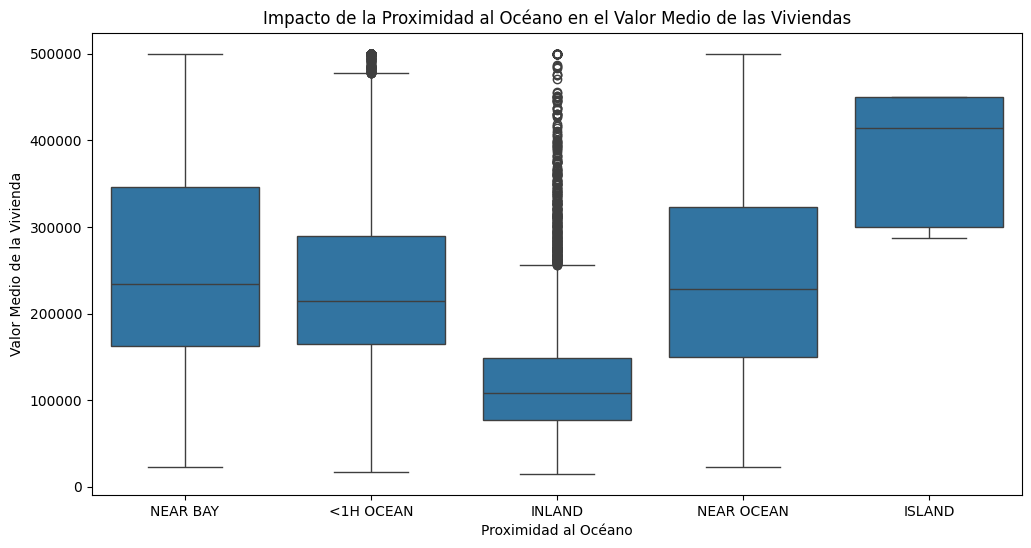

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Impacto de la Proximidad al Océano en el Valor Medio de las Viviendas')
plt.xlabel('Proximidad al Océano')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

Descripción del Gráfico:

- Es un diagrama de cajas que muestra la distribución de precios según la ubicación respecto al océano.
- Las viviendas en ISLAND tienen los valores más altos (mediana ~$400,000).
- Las propiedades INLAND (tierra adentro) tienen los valores más bajos (mediana ~$100,000).
- NEAR BAY y NEAR OCEAN muestran valores intermedios
Hay muchos valores atípicos (puntos) especialmente en la categoría INLAND.
- La variabilidad de precios es mayor en zonas cercanas al océano que en zonas interiores.
- Claramente la proximidad al océano influye positivamente en el valor de las viviendas.

2.6: Distribuciones segmentadas y filtradas

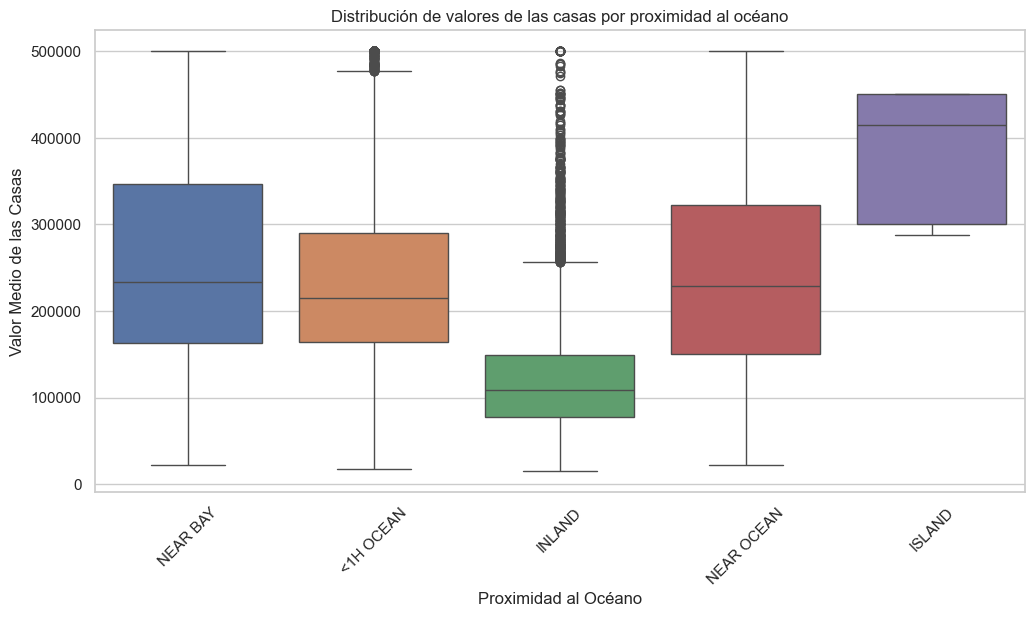

In [21]:
# Configuración de estilo
sns.set(style="whitegrid")

# Segmentación por ocean_proximity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', hue='ocean_proximity', dodge=False)

plt.title("Distribución de valores de las casas por proximidad al océano")
plt.xlabel("Proximidad al Océano")
plt.ylabel("Valor Medio de las Casas")
plt.xticks(rotation=45)
plt.show()

Descripción del Gráfico:

- Mismo análisis que el anterior pero con colores diferentes para mejor visualización.
- ISLAND: valores más altos (mediana ~$420,000).
- INLAND: valores más bajos (mediana ~$100,000).
- NEAR BAY y NEAR OCEAN: valores intermedios ($200,000-$300,000).
- Los puntos negros representan valores atípicos.
- Las cajas muestran el rango donde se concentra el 50% de los datos.
- Las líneas (bigotes) muestran los valores mínimos y máximos (sin contar atípicos).
- Clara tendencia: las propiedades más caras están cerca del agua.

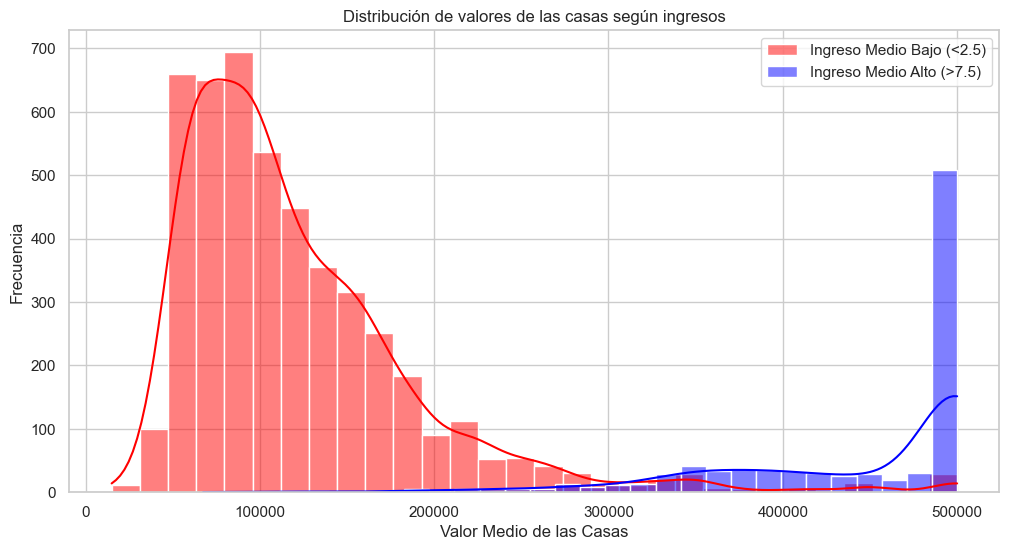

In [22]:
# Filtrar casas con ingresos medios bajos (< 2.5) y altos (> 7.5)
low_income = df[df['median_income'] < 2.5]
high_income = df[df['median_income'] > 7.5]

# Histogramas de valores medios de las casas
plt.figure(figsize=(12, 6))
sns.histplot(low_income['median_house_value'], bins=30, kde=True, color='red', label='Ingreso Medio Bajo (<2.5)')
sns.histplot(high_income['median_house_value'], bins=30, kde=True, color='blue', label='Ingreso Medio Alto (>7.5)')
plt.title("Distribución de valores de las casas según ingresos")
plt.xlabel("Valor Medio de las Casas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Descripción del Gráfico:

- Compara la distribución de precios entre zonas de ingresos altos y bajos.
- Ingresos Bajos (rojo):
  - Mayoría de casas entre $50,000 y $200,000.
  - Pico máximo alrededor de $100,000.
  - Distribución sesgada hacia la derecha.
- Ingresos Altos (azul):
  - Mayor dispersión de precios.
  - Muchas casas en el valor máximo ($500,000).
  - Distribución más uniforme.
- Clara diferencia en patrones de precios según nivel de ingresos.

2.7 Pairplots

Crearemos pairplots para explorar las relaciones entre variables seleccionadas.

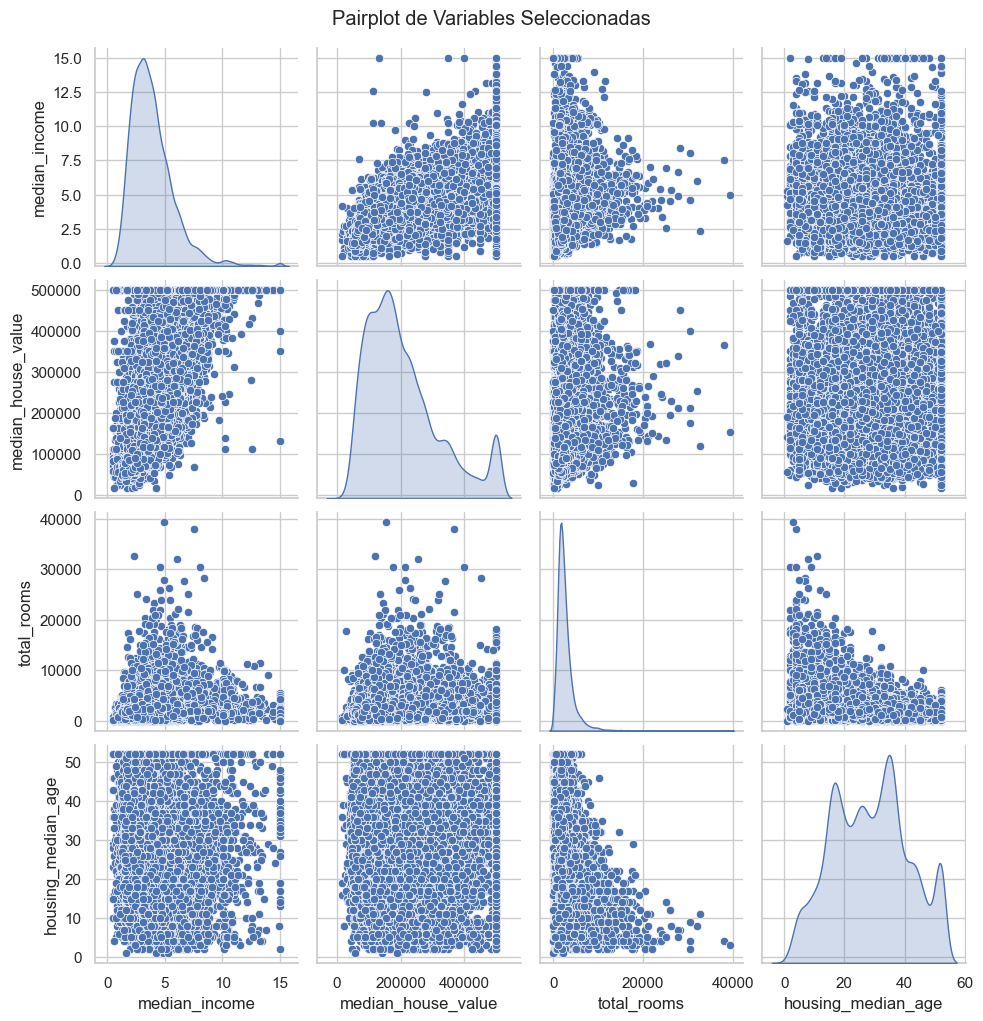

In [23]:
# Subconjunto de datos para el pairplot
subset = df[['median_income', 'median_house_value', 'total_rooms', 'housing_median_age']]

# Crear un Pairplot
sns.pairplot(subset, diag_kind="kde")
plt.suptitle("Pairplot de Variables Seleccionadas", y=1.02)
plt.show()


Descripción del Gráfico:

- Muestra relaciones entre 4 variables principales:
  - Ingreso medio.
  - Valor medio de vivienda.
  - Total de habitaciones.
  - Edad media de viviendas.
- Principales observaciones:
  - Correlación positiva fuerte entre ingreso y valor de vivienda.
  - No hay relación clara entre edad y valor de vivienda.
  - Total de habitaciones tiene correlación débil con el valor.
  - Las distribuciones (diagonales) muestran:
   - Valores de vivienda con límite en $500,000.
   - Ingresos concentrados entre 2-8.
   - Edad de viviendas distribuida uniformemente.
   - Total de habitaciones sesgado hacia valores bajos.

# Conclusiones

Después del análisis exhaustivo del mercado inmobiliario en California, se identificaron los siguientes factores clave:

1. Factores Determinantes del Precio:
- El ingreso medio del vecindario muestra la correlación más - fuerte con el valor de las viviendas.
- La proximidad al océano impacta significativamente: propiedades en islas o cerca de la costa tienen valores hasta 4 veces mayores que las interiores.
- Sorprendentemente, la edad de la vivienda tiene poca influencia en el precio

2. Patrones Geográficos y de Mercado:

- Las propiedades más valiosas se concentran en la región de la Bahía de San Francisco y áreas costeras.
- Existe un límite de precio máximo en $500,000, sugiriendo un techo en el mercado.
- Las zonas interiores muestran precios más estables y predecibles.

3. Recomendaciones para Inversores:

- Las mejores oportunidades se encuentran en:
 - Áreas costeras emergentes que aún no alcanzan el precio máximo.
 - Vecindarios con tendencias de incremento en ingresos medianos.
- Zonas cercanas a áreas de alto valor que muestran potencial de desarrollo.

4. Consideraciones Adicionales:

- La fuerte correlación entre ingresos y valores sugiere que el desarrollo económico local es clave.
- El mercado muestra una clara segmentación por ubicación y proximidad al océano.
- Los patrones de precio indican un mercado maduro con zonas bien definidas de alto y bajo valor.
- Esta información proporciona una base sólida para decisiones de inversión inmobiliaria en California, aunque se recomienda análisis específico por zona de interés.